In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

import joblib as jb

### Load data

In [2]:
path = r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\KagelX\KaggleX\data\clean\clean_data_2.parquet'

In [3]:
df = pd.read_parquet(path)

In [68]:
df.head(3)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,11000
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,8250
2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,15000


### categorical value count

In [43]:

# Generar gráficos de barras para cada columna categórica
for i in df.select_dtypes(exclude='number').columns:
    print(df[i].value_counts())
    print(100*'-')

brand
BMW              7369
Ford             6706
Mercedes-Benz    5087
Chevrolet        4424
Audi             2922
Porsche          2627
Toyota           2315
Lexus            2257
Jeep             2247
Land             1995
Cadillac         1565
Nissan           1252
GMC              1076
Dodge            1011
RAM               966
INFINITI          957
Lincoln           767
Mazda             748
Subaru            739
Hyundai           694
Jaguar            661
Volkswagen        628
Honda             624
Acura             580
Kia               526
Volvo             452
MINI              364
Maserati          293
Bentley           284
Chrysler          258
Genesis           249
Buick             228
Mitsubishi        182
Hummer            176
Pontiac           149
Alfa              144
Rolls-Royce       142
Lamborghini       122
Tesla             110
Ferrari            87
Saturn             58
Scion              53
Aston              50
McLaren            43
Rivian             27
Merc

### dummy columns

In [7]:
# label_brand = LabelEncoder()
# label_model = LabelEncoder()
#label_fuel = LabelEncoder()
label_engine = LabelEncoder()
# label_trans = LabelEncoder()
# label_ext_col = LabelEncoder()
# label_ext_int = LabelEncoder()
label_accident = LabelEncoder()

In [69]:
beta = ['price', 'engine', 'accident', 'milage', 'model_year']

In [210]:
df1 =df[beta].copy()

In [211]:
#df1['brand'] = label_brand.fit_transform(df['brand'])
#df1['model'] = label_brand.fit_transform(df['model'])
#df1['fuel_type'] = label_fuel.fit_transform(df['fuel_type'])
df1['engine'] = label_engine.fit_transform(df['engine'])
#df1['transmission'] = label_trans.fit_transform(df['transmission'])
#df1['ext_col'] = label_ext_col.fit_transform(df['ext_col'])
#df1['int_col'] = label_ext_int.fit_transform(df['int_col'])
df1['accident'] = label_accident.fit_transform(df['accident'])

In [34]:
# jb.dump(label_engine, 'label_engine.pkl')
# jb.dump(label_model, 'label_model.pkl')
# jb.dump(label_fuel, 'label_fuel.pkl')
# jb.dump(label_brand, 'label_brand.pkl')
# jb.dump(label_trans, 'label_trans.pkl')
# jb.dump(label_ext_col, 'label_ext_col.pkl')
# jb.dump(label_ext_int, 'label_int_col.pkl')
# jb.dump(label_accident, 'label_accident.pkl')

['label_accident.pkl']

In [212]:
df1.head(5)

,price,engine,accident,milage,model_year
0,11000,719,1,74349,2018
1,8250,534,1,80000,2007
2,15000,541,1,91491,2009
3,63500,646,1,2437,2022
4,7850,219,1,111000,2001


In [198]:
df1.describe()

,price,engine,accident,milage,model_year
count,5.427300e+04,54273.000000,54273.000000,54273.000000,54273.000000
mean,3.921844e+04,565.570799,0.735098,72746.175667,2015.091979
std,7.282634e+04,262.411316,0.441285,50469.490448,5.588909
min,2.000000e+03,0.000000,0.000000,100.000000,1974.000000
25%,1.550000e+04,347.000000,0.000000,32268.000000,2012.000000
50%,2.800000e+04,582.000000,1.000000,66107.000000,2016.000000
75%,4.500000e+04,785.000000,1.000000,102000.000000,2019.000000
max,2.954083e+06,1060.000000,1.000000,405000.000000,2024.000000


In [164]:
df1.shape

(54273, 5)

In [214]:
df1 = df1[df1['milage'] < 300000]
df1 = df1[df1['price'] < 500000]
df1 = df1[df1['model_year'] > 1990]

In [215]:
df1.shape

(54034, 5)

### target 'price' distribution

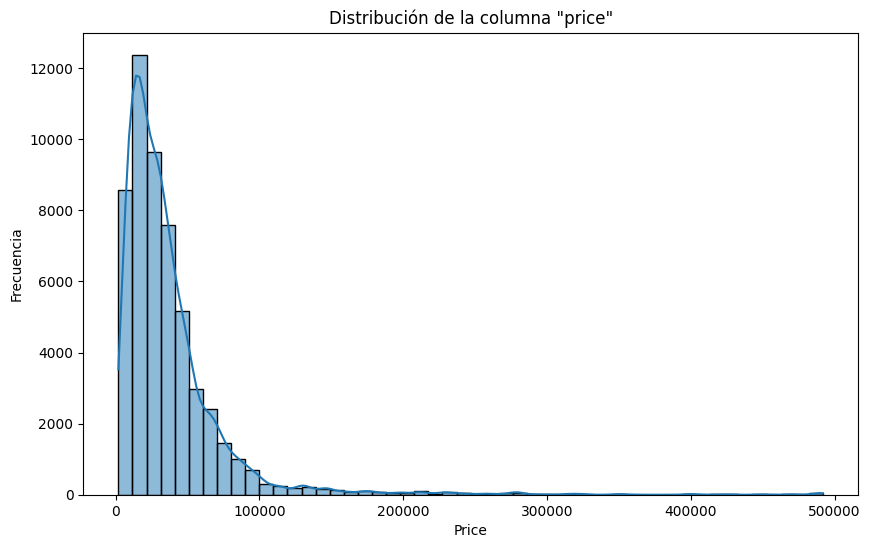

In [150]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['price'], bins=50, kde=True)
plt.title('Distribución de la columna "price"')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.show()

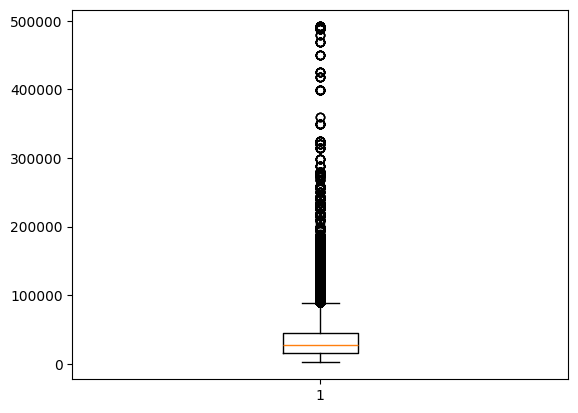

In [172]:
plt.boxplot(df1['price'])
plt.show()

In [230]:
df1['milage'].describe()

count     54034.000000
mean      72229.790687
std       49248.229449
min         100.000000
25%       32268.000000
50%       66000.000000
75%      101900.000000
max      249999.000000
Name: milage, dtype: float64

In [200]:

df1.head(2)

,price,engine,accident,milage,model_year
0,11000,719,1,74349,2018
1,8250,534,1,80000,2007


In [216]:
df1['milage_ratio'] = df1['milage']/df1['model_year']
df1['delta'] = df1['engine'] + df1['accident'] 


#df1['5_plus'] = ((df1['milage'] > 5000) & (df1['model_year'] < 2019)).astype(int)

In [217]:
df1.head(1)

,price,engine,accident,milage,model_year,milage_ratio,delta
0,11000,719,1,74349,2018,36.842914,720


### Feature 2

In [110]:
from sklearn.cluster import KMeans


In [223]:
inertia = []
k_range = range(1,11)

In [224]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df1[['engine','milage_ratio']])
    inertia.append(kmeans.inertia_)

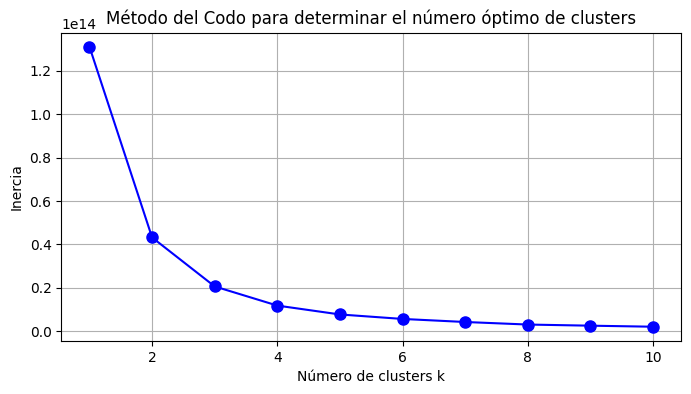

In [225]:
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Número de clusters k')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.grid(True)
plt.show()

In [226]:
kmeans = KMeans(n_clusters=3, random_state=0)
df1["Cluster"] = kmeans.fit_predict(df1[['engine','milage_ratio']])
df1["Cluster"] = df1["Cluster"].astype("category")
df1['Cluster'] = df1['Cluster'].cat.codes


df1.head()

,price,engine,accident,milage,model_year,milage_ratio,delta,Cluster,Cluster_1
0,11000,719,1,74349,2018,36.842914,720,1,0
1,8250,534,1,80000,2007,39.860488,535,0,0
2,15000,541,1,91491,2009,45.540567,542,0,0
3,63500,646,1,2437,2022,1.205242,647,0,1
4,7850,219,1,111000,2001,55.472264,220,2,0


In [204]:
print(kmeans)

KMeans(n_clusters=3, random_state=0) KMeans(n_clusters=3, random_state=0)


In [190]:
df1['Cluster'].info()

<class 'pandas.core.series.Series'>
Index: 54034 entries, 0 to 54272
Series name: Cluster
Non-Null Count  Dtype
--------------  -----
54034 non-null  int8 
dtypes: int8(1)
memory usage: 474.9 KB


In [191]:
import joblib as jb

In [205]:
jb.dump(kmeans,r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\KagelX\KaggleX\booknotes\s1_t2\kmeans_model.pkl')


['D:\\0_Respaldo\\0_Proyectos_2024\\ML_proyects\\KagelX\\KaggleX\\booknotes\\s1_t2\\kmeans_model_1.pkl']

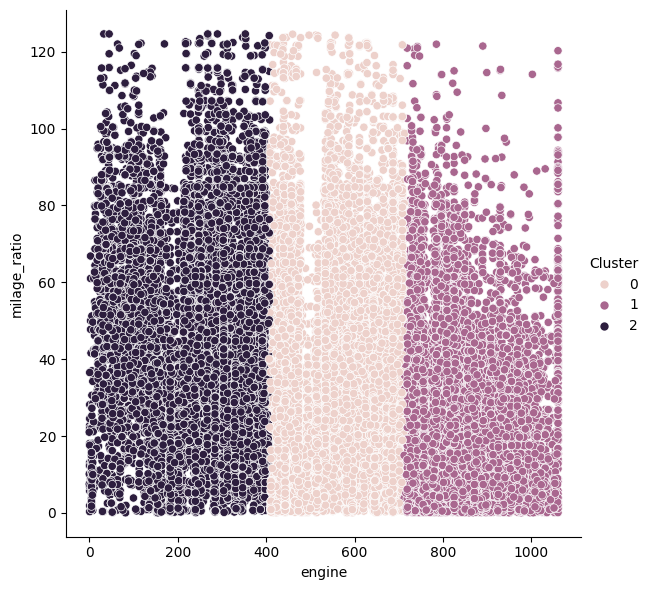

In [227]:
sns.relplot(
    x="engine", y="milage_ratio", hue="Cluster", data=df1, height=6,
)

In [159]:
df1.head(5)

,price,engine,accident,milage,model_year,milage_ratio,delta,Cluster
0,11000,719,1,74349,2018,36.842914,720,1
1,8250,534,1,80000,2007,39.860488,535,0
2,15000,541,1,91491,2009,45.540567,542,0
3,63500,646,1,2437,2022,1.205242,647,0
4,7850,219,1,111000,2001,55.472264,220,2


### feature engenieering

In [ ]:
# df1['milage_ratio'] = df1['milage']/df1['model_year']

In [ ]:
# df1.head(5)

In [ ]:
# df1['log_milage'] = np.log(df1['milage'])

In [ ]:
#discret years
# df1['years_range'] = pd.cut(df['model_year'], bins=[0,2010,2014,2015,2016,2017,2018,2024], labels=['modelo 0 a 2010', 'modelo 2010 a 2014', 'modelo 2014 a 2015', 'modelo 2015 a 2016', 'modelo 2016 a 2017', 'modelo 2017 a 2018','modelo 2018 a 2024'])

In [ ]:
# dummies = pd.get_dummies(df1['years_range'], dtype='int64')
# df1 = pd.concat([df1, dummies], axis=1)

In [ ]:
# del df1['years_range']

In [ ]:
# df1.head(2)

In [ ]:
# dummies = pd.get_dummies(df1['brand'], dtype='int64')
# df1 = pd.concat([df1, dummies], axis=1)

In [ ]:
# del df1['brand']

In [ ]:
# df1.head(2)

In [ ]:
# dummies = pd.get_dummies(df1['engine'], dtype='int64')
# df1 = pd.concat([df1, dummies], axis=1)

In [ ]:
# del df1['engine']

In [ ]:
# df1.head(2)

In [ ]:
# dummies = pd.get_dummies(df1['accident'], dtype='int64')
# df1 = pd.concat([df1, dummies], axis=1)
# del df1['accident']

In [ ]:
# df1.head(1)

### Export parquet file

In [229]:
path = r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\KagelX\KaggleX\booknotes\s1_t2\beta_data.parquet'
df1.to_parquet(path)